### Importação dos dados



In [ ]:
import pandas as pd

loja_1 = pd.read_csv('/content/drive/MyDrive/alura-es-cursos/challenge1-data-science/challenge1-data-science-8fd587a219397acec5461ac07e98a32e87ac58f4/base-de-dados-challenge-1/loja_1.csv')
loja_2 = pd.read_csv('/content/drive/MyDrive/alura-es-cursos/challenge1-data-science/challenge1-data-science-8fd587a219397acec5461ac07e98a32e87ac58f4/base-de-dados-challenge-1/loja_2.csv')
loja_3 = pd.read_csv('/content/drive/MyDrive/alura-es-cursos/challenge1-data-science/challenge1-data-science-8fd587a219397acec5461ac07e98a32e87ac58f4/base-de-dados-challenge-1/loja_3.csv')
loja_4 = pd.read_csv('/content/drive/MyDrive/alura-es-cursos/challenge1-data-science/challenge1-data-science-8fd587a219397acec5461ac07e98a32e87ac58f4/base-de-dados-challenge-1/loja_4.csv')

loja_1['loja'] = 'loja_1'
loja_2['loja'] = 'loja_2'
loja_3['loja'] = 'loja_3'
loja_4['loja'] = 'loja_4'


df_geral = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

#1. Análise do faturamento


Nesta primeira análise, você deve calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento

In [ ]:
loja_1["loja"] = "Loja 1"
loja_2["loja"] = "Loja 2"
loja_3["loja"] = "Loja 3"
loja_4["loja"] = "Loja 4"

lojas = pd.concat([loja_1, loja_2, loja_3, loja_4])

In [ ]:
faturamento_por_loja = lojas.groupby("loja")["Preço"].sum().reset_index()
faturamento_por_loja.columns = ["Loja", "Faturamento Total"]
print(faturamento_por_loja)


     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


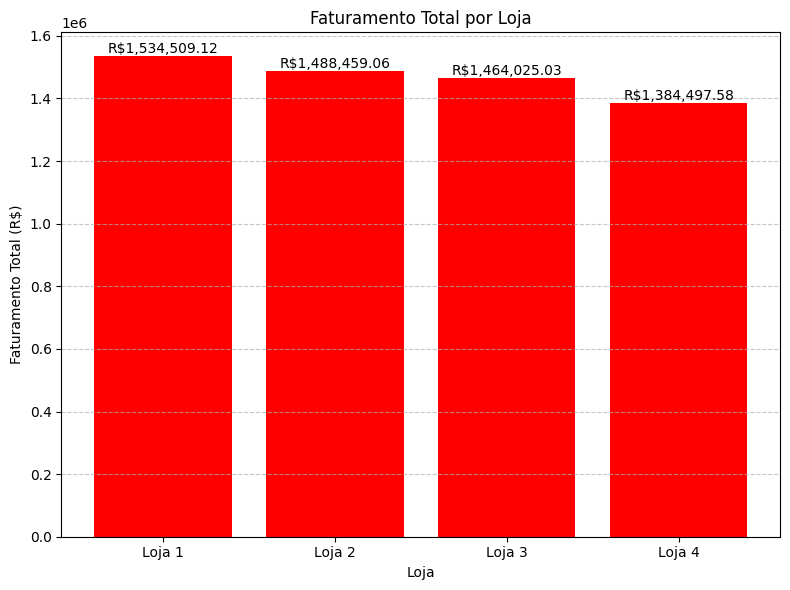

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(faturamento_por_loja["Loja"], faturamento_por_loja["Faturamento Total"], color="red")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'R${height:,.2f}',
        ha='center', va='bottom'
    )

plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento Total (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Neste passo, deve calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja

In [ ]:
vendas_gerais_por_categoria = lojas.groupby("Categoria do Produto").size()
vendas_gerais_por_categoria

,0
Categoria do Produto,
brinquedos,1290
eletrodomesticos,1149
eletronicos,1772
esporte e lazer,1113
instrumentos musicais,753
livros,742
moveis,1886
utilidades domesticas,730


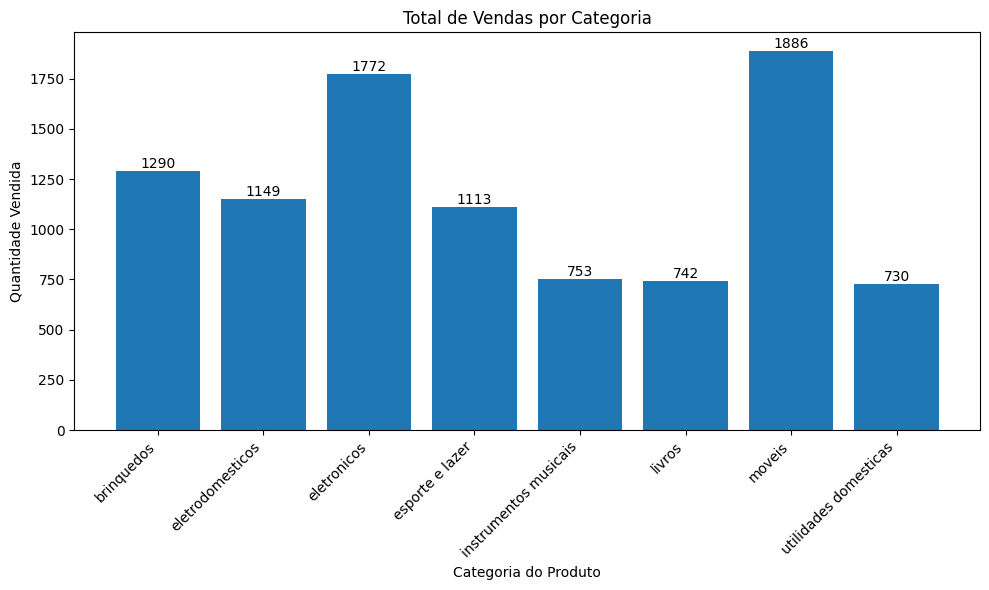

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_gerais_por_categoria.index, vendas_gerais_por_categoria.values)

plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.title("Total de Vendas por Categoria")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')


# 3. Média de Avaliação das Lojas

Neste passo, vamos calcular a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos.

In [ ]:
media_avaliacoes_por_loja = lojas.groupby('loja')['Avaliação da compra'].mean().reset_index()
media_avaliacoes_por_loja['Avaliação da compra'] = media_avaliacoes_por_loja['Avaliação da compra'].round(2)
print(media_avaliacoes_por_loja.to_string(index=False))

  loja  Avaliação da compra
Loja 1                 3.98
Loja 2                 4.04
Loja 3                 4.05
Loja 4                 4.00


# 4. Produtos Mais e Menos Vendidos

Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.

In [ ]:
vendas_por_produto_loja = lojas.groupby(['loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')
mais_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('loja')['Quantidade de Vendas'].idxmax()]
menos_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('loja')['Quantidade de Vendas'].idxmin()]

print("Produtos mais vendidos por loja:\n", mais_vendidos.to_string(index=False))
print("\nProdutos menos vendidos por loja:\n", menos_vendidos.to_string(index=False))

Produtos mais vendidos por loja:
   loja                  Produto  Quantidade de Vendas
Loja 1            Guarda roupas                    60
Loja 2 Iniciando em programação                    65
Loja 3            Kit banquetas                    57
Loja 4                 Cama box                    62

Produtos menos vendidos por loja:
   loja           Produto  Quantidade de Vendas
Loja 1      Celular ABXY                    33
Loja 2 Jogo de tabuleiro                    32
Loja 3  Blocos de montar                    35
Loja 4          Guitarra                    33


# 5. Frete Médio por Loja


Neste passo, vamos calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas.


In [ ]:
custo_medio_frete = lojas.groupby("loja")["Frete"].mean().reset_index()
custo_medio_frete.columns = ["Loja", "Custo Médio de Frete"]
custo_medio_frete["Custo Médio de Frete"] = custo_medio_frete["Custo Médio de Frete"].round(2)

print(custo_medio_frete.to_string(index=False))

  Loja  Custo Médio de Frete
Loja 1                 34.69
Loja 2                 33.62
Loja 3                 33.07
Loja 4                 31.28


# 6. Análise de Desempenho Geográfico

Utilize os dados de latitude (lat) e longitude (lon) para mapear as vendas de cada loja e analisar a distribuição geográfica dos produtos vendidos.

Gere gráficos de dispersão ou mapas de calor (Heatmaps) para visualizar os dados e identificar áreas com maior concentração de vendas.

Explore se algumas lojas têm um desempenho superior ou inferior em determinadas regiões, e identifique se existem padrões geográficos que possam influenciar o desempenho das lojas.

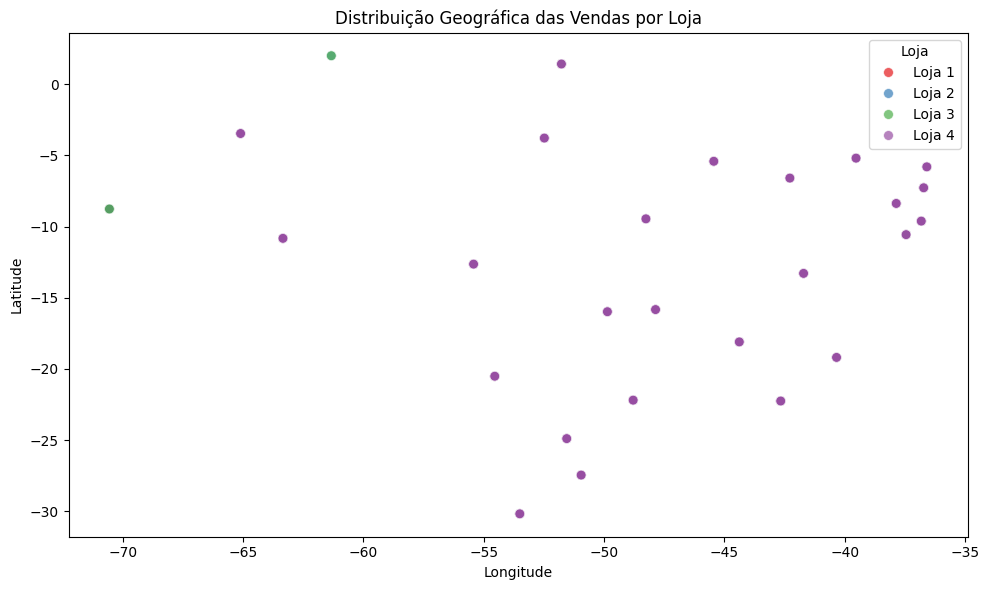

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lojas, x='lon', y='lat', hue='loja', palette='Set1', s=50, alpha=0.7)
plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Loja', loc='upper right')
plt.tight_layout()
plt.show()

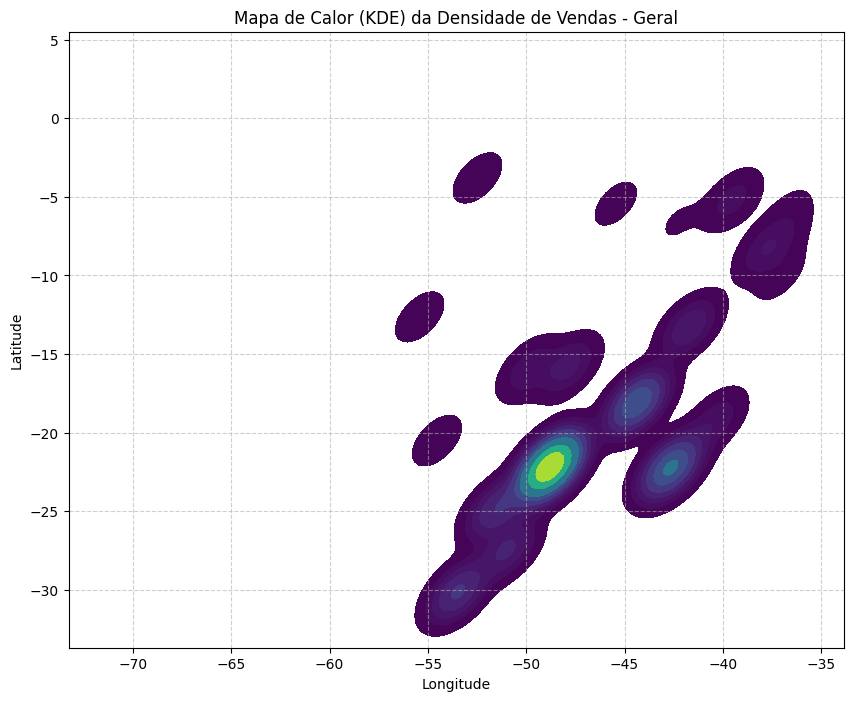

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=lojas, x="lon", y="lat", fill=True, cmap="viridis", thresh=0.05)
plt.title('Mapa de Calor (KDE) da Densidade de Vendas - Geral')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.6)

  # 8. Relatório Final


O objetivo deste relatório é fornecer uma recomendação para o Senhor João sobre qual loja ele deve vender, levando em consideração uma série de fatores importantes para a análise de desempenho das lojas.

Para isso, foram analisados aspectos como:

* Faturamento total das lojas.

* Categorias de produtos mais e menos vendidas.

* Média das avaliações dos clientes por loja.

* Produtos mais e menos vendidos.

* Custo médio de frete de cada loja.

* Distribuição geográfica das vendas.

O **faturamento total** representa a receita bruta gerada por cada loja. A análise revelou a seguinte ordem:

1. Loja 1: R$ 1.534.509,12

2. Loja 2: R$ 1.488.459,06

3. Loja 3: R$ 1.464.025,03

4. Loja 4: R$ 1.384.497,58

A análise das **categorias mais vendidas** mostrou um padrão consistente em todas as lojas:

**Categoria Mais Popular** (Geral): Móveis (consistentemente a mais vendida em todas as lojas).

**Segunda Categoria Mais Popular** (Geral): Eletrônicos.


A **satisfação do cliente**, medida pela média das avaliações (*escala provável de 1 a 5*), mostrou resultados muito próximos entre as lojas:

Loja 1: 4.01

Loja 2: 4.04

Loja 3: 4.05

Loja 4: 4.00


A análise dos produtos específicos revelou variações entre as lojas:

Loja 1:
Mais Vendidos (60 unidades): Guarda roupas, Micro-ondas, TV Led UHD 4K

Menos Vendidos (33 unidades): Celular ABXY, Headset

Loja 2:

Mais Vendido (65 unidades): Iniciando em programação

Menos Vendido (32 unidades): Jogo de tabuleiro

Loja 3:

Mais Vendido (57 unidades): Kit banquetas

Menos Vendido (35 unidades): Blocos de montar

Loja 4:

Mais Vendido (62 unidades): Cama box

Menos Vendido (33 unidades): Guitarra

O **custo médio** de frete por venda variou entre as lojas:

Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28

Com base na análise comparativa dos dados, podemos traçar um perfil para cada loja:

Loja 1: Maior faturamento, mas também o maior custo médio de frete e a menor média de avaliação (embora ainda alta).

Loja 2: Segundo maior faturamento, boa avaliação média, produto com maior volume de vendas individual, mas também o produto com menor volume.

Loja 3: Terceiro maior faturamento, maior média de avaliação (ligeiramente), frete médio competitivo.

Loja 4: Menor faturamento, avaliação média ligeiramente inferior às Lojas 2 e 3, mas o menor custo médio de frete.

Considerando os fatores analisados, a decisão sobre qual loja vender depende dos critérios prioritários para o Senhor João.

Recomendação:
A Loja 4 parece ser a candidata mais razoável para venda.

Considerando a combinação de menor contribuição para o faturamento total e um desempenho geral alinhado (*sem grandes desvantagens, exceto a receita*), a **Loja 4** surge como a opção mais lógica para ser considerada para venda pelo Senhor João.
